### Pre-requisites

Install gensim using the following command

```pip install -U gensim```

### Overview

***Gensim***: It isn't really a deep learning package. It's a package for word and text similarity modeling, which started with Latent Dirichlet Allocation (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

https://pypi.org/project/gensim/

***Note***: In the notebook the word "word vector" and "embeddings" have been used inter-changeably.

In [49]:
# Import libraries
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

***Glove word vectors***: Stanford offers GloVe word vectors. Gensim doesn't give them first class support, but allows us to convert a file of GloVe vectors into word2vec format. Download the GloVe vectors from https://nlp.stanford.edu/projects/glove/. The stanford Glove vectors comes in 50, 100, 200 and 300 dimensional embeddings.

In [7]:
glove_file = datapath('/home/aims/Projects/nlp-projects/glove6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [8]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [13]:
model.most_similar('nigeria')

[('ghana', 0.7884411811828613),
 ('angola', 0.7677444815635681),
 ('nigerian', 0.749350905418396),
 ('kenya', 0.74388587474823),
 ('algeria', 0.74196457862854),
 ('niger', 0.7322003245353699),
 ('cameroon', 0.7195509672164917),
 ('zimbabwe', 0.710436224937439),
 ('zambia', 0.7103115320205688),
 ('senegal', 0.6981102228164673)]

In [14]:
model.most_similar('mother')

[('daughter', 0.9063106775283813),
 ('wife', 0.9025880694389343),
 ('grandmother', 0.8934445977210999),
 ('father', 0.8656661510467529),
 ('sister', 0.8647424578666687),
 ('husband', 0.8470972180366516),
 ('woman', 0.8275688886642456),
 ('her', 0.825068473815918),
 ('aunt', 0.8055844306945801),
 ('daughters', 0.7969927787780762)]

In [21]:
model.most_similar('linux', topn = 20)

[('unix', 0.7451671361923218),
 ('freebsd', 0.7322854399681091),
 ('os', 0.7309498190879822),
 ('ubuntu', 0.6977415084838867),
 ('kernel', 0.6871894598007202),
 ('os/2', 0.6783009767532349),
 ('gnu/linux', 0.6735050678253174),
 ('desktop', 0.6716502904891968),
 ('server', 0.6666172742843628),
 ('open-source', 0.6649784445762634),
 ('xp', 0.6552406549453735),
 ('solaris', 0.6454194188117981),
 ('software', 0.6416986584663391),
 ('bsd', 0.6415143013000488),
 ('macintosh', 0.6379666924476624),
 ('ms-dos', 0.6367701292037964),
 ('ios', 0.6292221546173096),
 ('unix-like', 0.6251828074455261),
 ('android', 0.6236051917076111),
 ('third-party', 0.6230614185333252)]

In [22]:
model.most_similar(negative='linux', topn=5)

[('http://www.opel.com', 0.6429437398910522),
 ('bb94', 0.6249831914901733),
 ('kd95', 0.6102238893508911),
 ('kemnay', 0.6060603857040405),
 ('kanamori', 0.6026533842086792)]

In [23]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
# round off to 4 decimal places
print('{}: {:.4f}'.format(*result[0]))
result

queen: 0.7699


[('queen', 0.7698541283607483),
 ('monarch', 0.684337854385376),
 ('throne', 0.675573468208313),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438),
 ('prince', 0.651703417301178),
 ('elizabeth', 0.6464518308639526),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470227241516),
 ('wife', 0.6098655462265015)]

In [24]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [30]:
analogy('nigeria', 'nigerian', 'america')

'american'

In [31]:
analogy('australia', 'beer', 'france')

'champagne'

In [32]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [33]:
analogy('tall', 'tallest', 'long')

'longest'

In [36]:
# Singluar and Plural Analogy
analogy('plate', 'plates', 'book')

'books'

In [37]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/aims/.local/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
vocab_keys = model.vocab.keys()
print('Number of words in the vocabulary: {}'.format(len(list(vocab_keys))))
print(list(vocab_keys)[0:15])

Number of words in the vocabulary: 400000
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is']


In [17]:
## Access vector for one word 
print(model['good'])

[-0.030769   0.11993    0.53909   -0.43696   -0.73937   -0.15345
  0.081126  -0.38559   -0.68797   -0.41632   -0.13183   -0.24922
  0.441      0.085919   0.20871   -0.063582   0.062228  -0.051234
 -0.13398    1.1418     0.036526   0.49029   -0.24567   -0.412
  0.12349    0.41336   -0.48397   -0.54243   -0.27787   -0.26015
 -0.38485    0.78656    0.1023    -0.20712    0.40751    0.32026
 -0.51052    0.48362   -0.0099498 -0.38685    0.034975  -0.167
  0.4237    -0.54164   -0.30323   -0.36983    0.082836  -0.52538
 -0.064531  -1.398     -0.14873   -0.35327   -0.1118     1.0912
  0.095864  -2.8129     0.45238    0.46213    1.6012    -0.20837
 -0.27377    0.71197   -1.0754    -0.046974   0.67479   -0.065839
  0.75824    0.39405    0.15507   -0.64719    0.32796   -0.031748
  0.52899   -0.43886    0.67405    0.42136   -0.11981   -0.21777
 -0.29756   -0.1351     0.59898    0.46529   -0.58258   -0.02323
 -1.5442     0.01901   -0.015877   0.024499  -0.58017   -0.67659
 -0.040379  -0.44043    0.0

***PCA:*** It is a non-linear dimensionality reduction technique. This is one of the algorithm to visualize the multi-dimensional(300) data (embeddings) into 2D space. For more information about the fit_transform() function used below, please refer - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [43]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            # list converts dictionary (model.vocab.keys()) into the list of objects
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
            
    word_vectors = np.array([model[w] for w in words])
    
    # Rows is Number of words and column is the embedding dimension(100)
    print('word_vectors.shape:', word_vectors.shape)
    
    transform = PCA().fit_transform(word_vectors)
    print('transform.shape: {}'.format(transform.shape))
    
    # Fetch the first two columns of the matrix
    twodim = transform[:,:2]
    print('twodim.shape: {}'.format(twodim.shape))
    
    plt.figure(figsize=(7,7))
    
    # x axis plots the first column of all the rows 
    # and y axis plots the second column of all the rows.
    plt.scatter(twodim[:, 0], twodim[0:,1], edgecolors='k', c='b')
    
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

word_vectors.shape: (46, 100)
transform.shape: (46, 46)
twodim.shape: (46, 2)


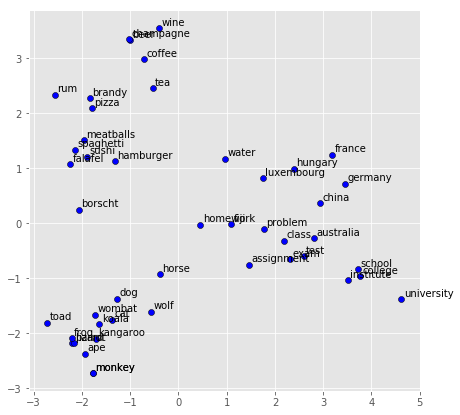

In [50]:
display_pca_scatterplot(model,
        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
         'school', 'college', 'university', 'institute'])

word_vectors.shape: (300, 100)
transform.shape: (300, 100)
twodim.shape: (300, 2)


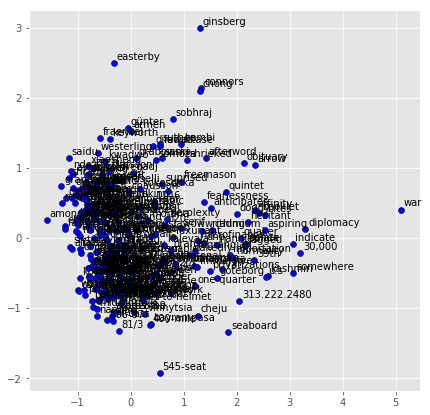

In [51]:
display_pca_scatterplot(model, sample=300)